In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore') # no more warnings 

In [3]:
file1 = pd.read_csv('/Users/pedro/Desktop/Ironhack/Unit 01/labs/customer analysis/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
file1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
file1.shape

(10910, 26)

In [5]:
file1.columns = [file1.columns[i].lower().replace(' ', '_') for i in range(len(file1.columns))]

In [6]:
file1 = file1.set_index('unnamed:_0')
file1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [7]:
file1.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [8]:
for i in file1.isna().columns:
    if file1.isna().sum()[i] !=0:
        data = file1.dropna()

In [9]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [10]:
categorical=data.select_dtypes('object')
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
unnamed:_0,,,,,,,,,,,,,,,,,
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A


In [11]:
numerical=data.select_dtypes('number')
numerical=numerical.describe().apply(lambda x: round(x,2))
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00
mean,8033.71,37453.03,93.77,15.11,48.15,0.39,2.98,436.48
std,6959.53,30257.40,35.09,10.16,28.15,0.91,2.39,295.03
min,1904.00,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,4039.09,0.00,69.00,6.00,24.00,0.00,1.00,265.69
50%,5846.52,34455.00,83.00,14.00,47.00,0.00,2.00,384.00
75%,8936.60,61560.00,110.00,23.00,72.00,0.00,4.00,552.00
max,83325.38,99961.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [12]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date']

unnamed:_0
2       2011-02-10
3       2011-01-11
10      2011-01-02
13      2011-01-26
16      2011-02-07
           ...    
10902   2011-01-24
10903   2011-01-07
10904   2011-02-24
10906   2011-01-06
10908   2011-02-13
Name: effective_to_date, Length: 4543, dtype: datetime64[ns]

In [13]:
month_column=[]
for i in data['effective_to_date']:
    month_column.append(i.month)
data.insert(8,'month',month_column)

In [14]:
data[data['month'] <=3];

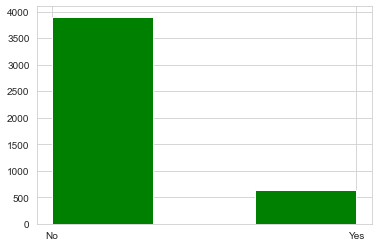

In [15]:
sns.set_style('whitegrid')
data['response'].hist(bins=3,color='g')
plt.show()

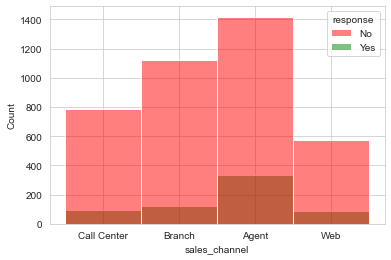

In [16]:
sns.set_style('whitegrid')
sns.histplot(data=data, x='sales_channel', hue='response',palette=['r', 'g'])
plt.show()

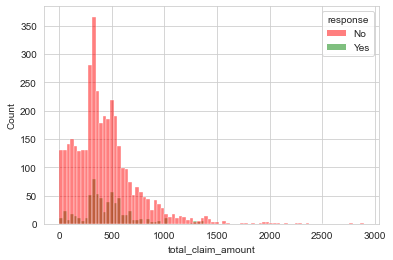

In [17]:
sns.set_style('whitegrid')
sns.histplot(data=data, x='total_claim_amount', hue='response', palette=['r', 'g'])
plt.show()

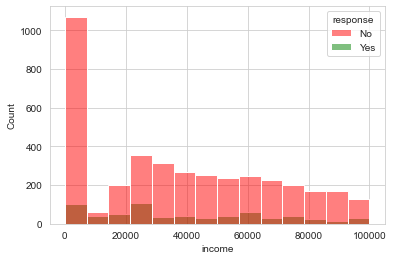

In [18]:
sns.histplot(data=data, x='income', hue='response',palette=['r', 'g'])
plt.show()

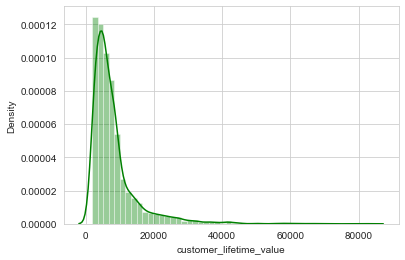

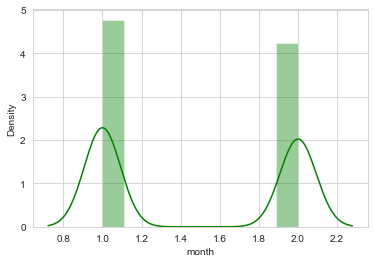

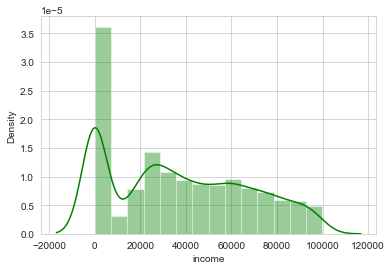

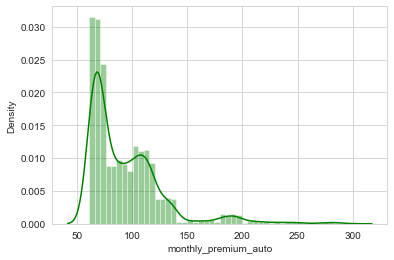

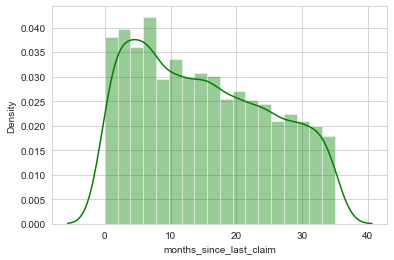

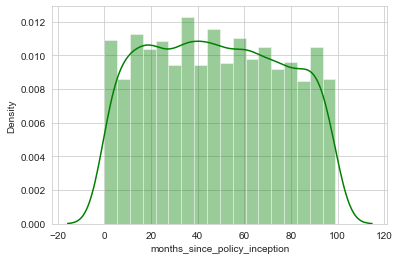

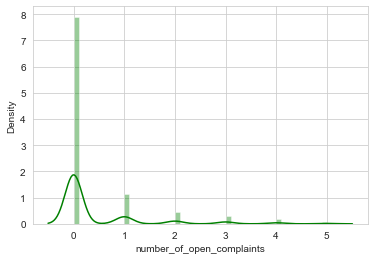

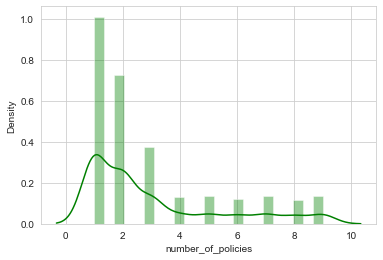

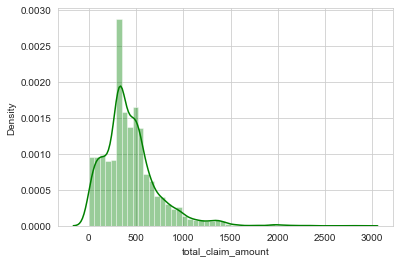

In [19]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column],color='g')
    plt.show()

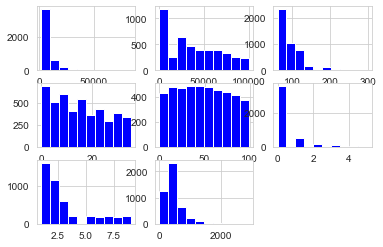

In [20]:
j=1
for i in numerical.columns:
    plt.subplot(3,3,j)
    plt.hist(data=data, x=i,color='b')
    j=j+1
plt.show()

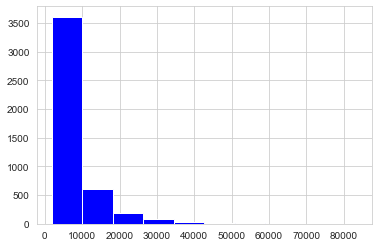

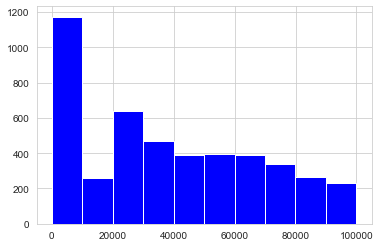

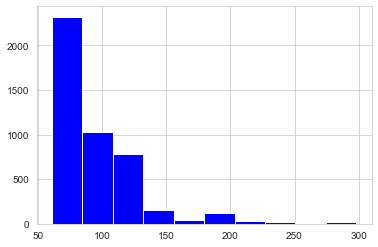

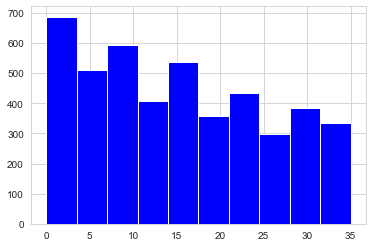

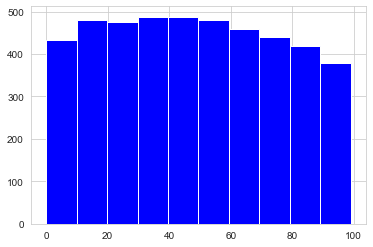

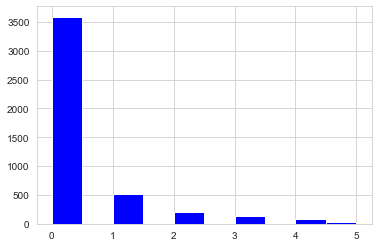

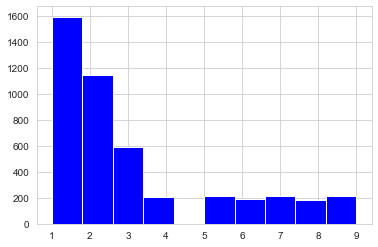

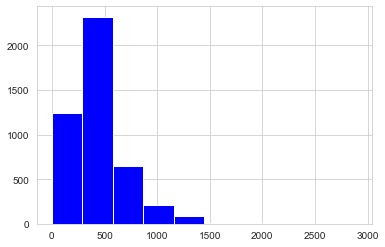

In [21]:
for i in numerical.columns:
    plt.hist(data=data, x=i,color='b')
    plt.show()

In [22]:
data_corr=data.corr()
data_corr

,customer_lifetime_value,month,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,-0.020217,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
month,-0.020217,1.000000,0.004593,-0.002390,-0.010319,0.003928,0.005646,0.025147,-0.004340
income,0.015914,0.004593,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
monthly_premium_auto,0.413739,-0.002390,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
months_since_last_claim,0.029199,-0.010319,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months_since_policy_inception,0.022465,0.003928,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number_of_open_complaints,-0.034924,0.005646,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number_of_policies,0.015397,0.025147,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
total_claim_amount,0.228579,-0.004340,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


In [23]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

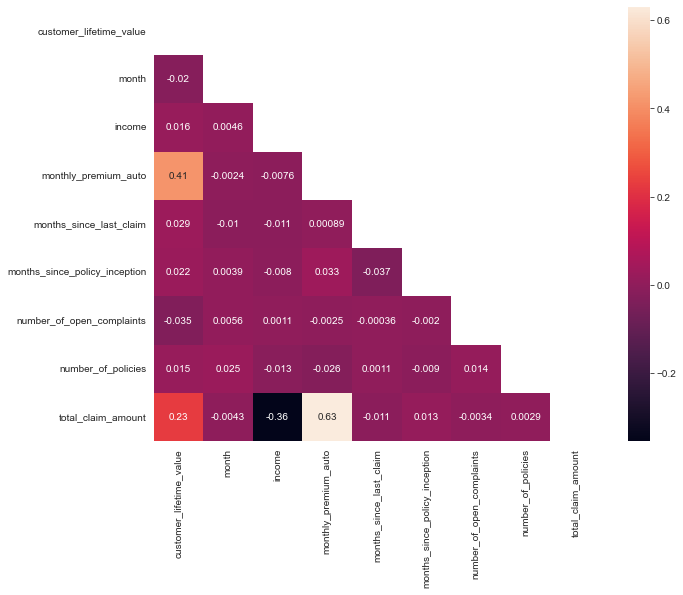

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

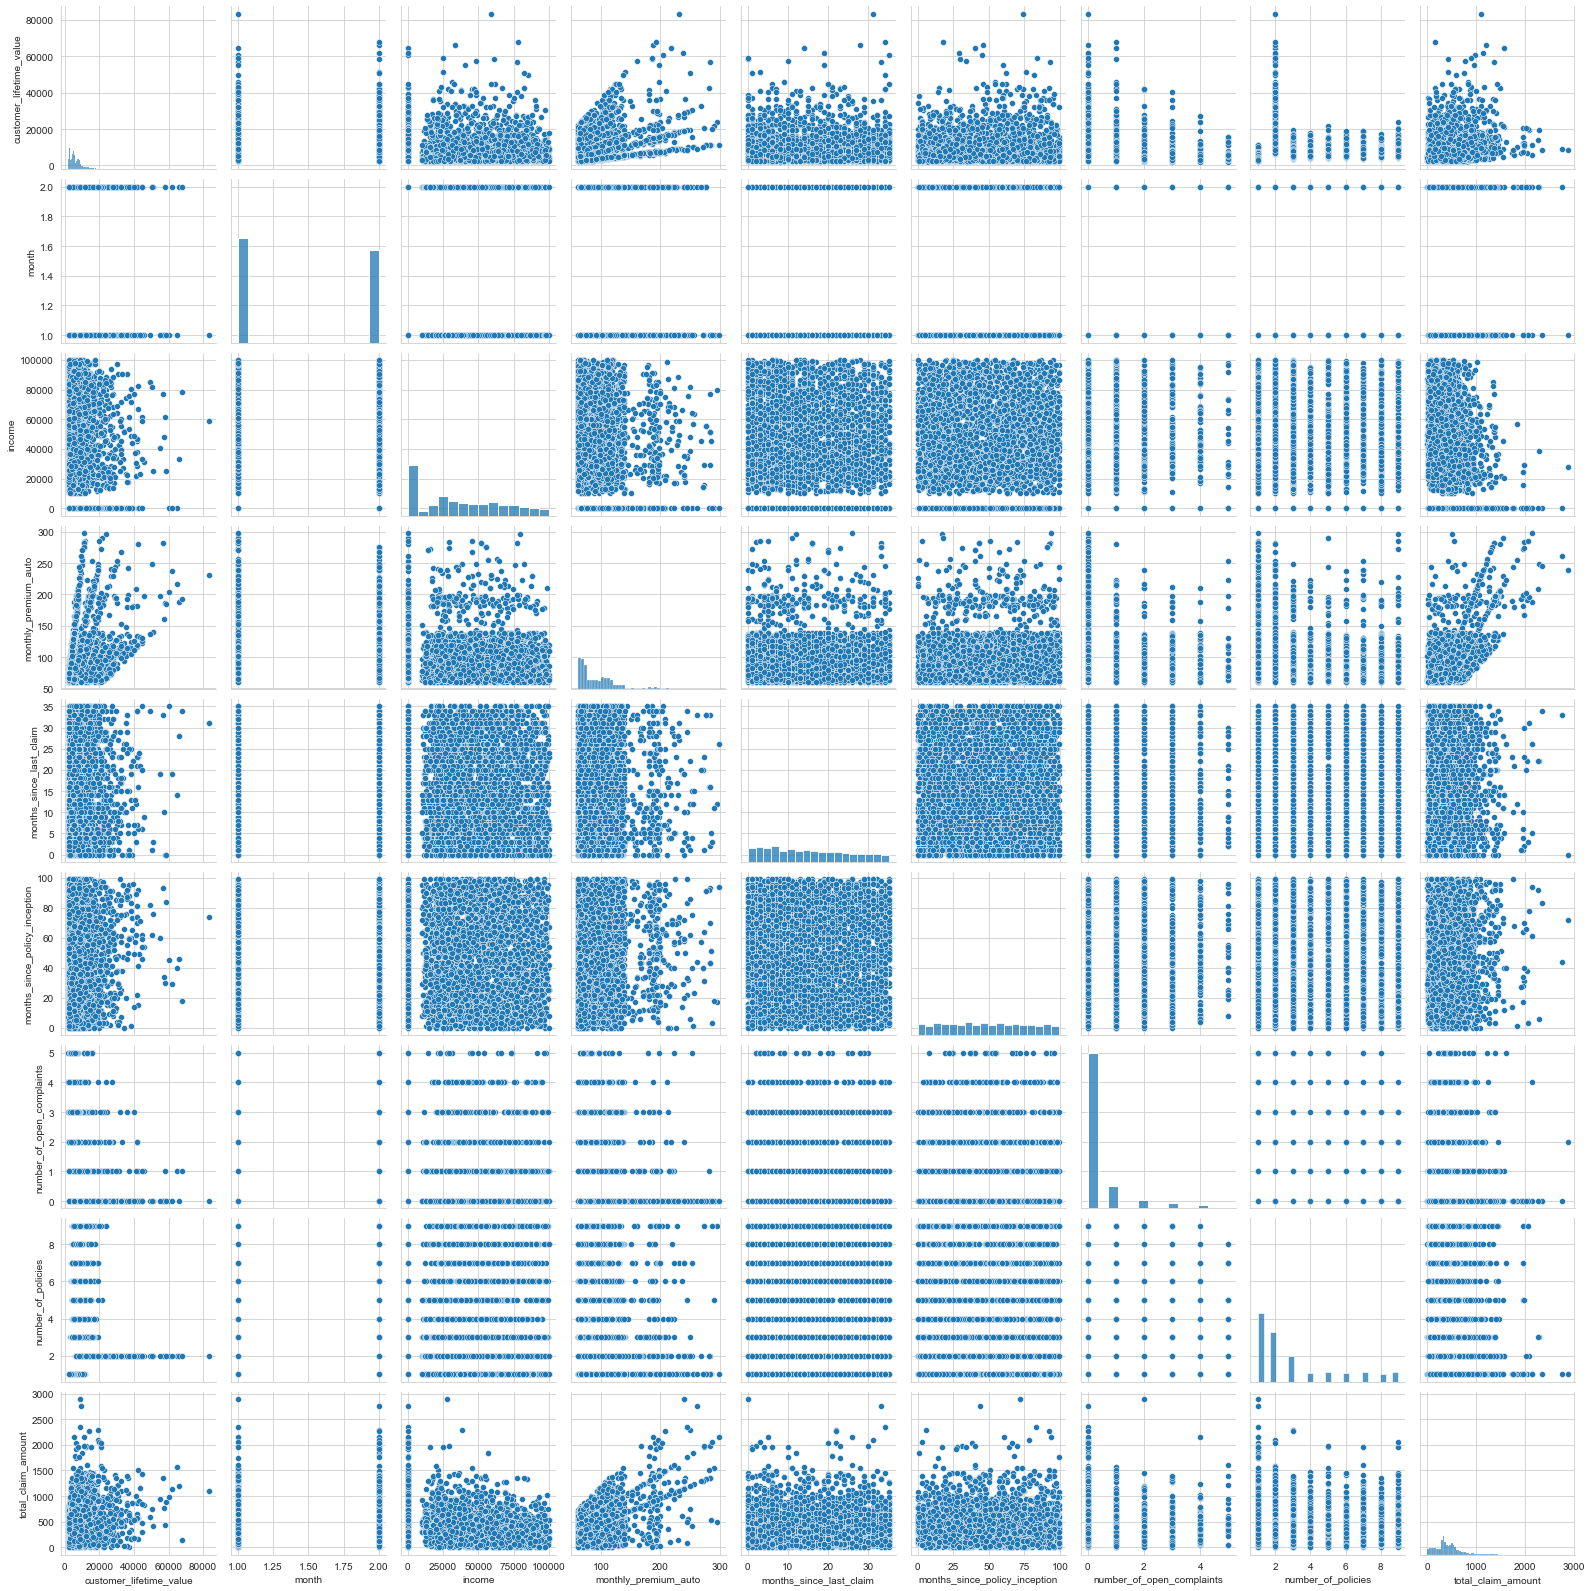

In [26]:
sns.pairplot(data)

In [27]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [28]:
df, _ci = boxcox_transform(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,month,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
2,LZ68649,Washington,2.813516,No,Basic,Bachelor,2011-02-10,Employed,0.581004,M,...,0.627832,0.610074,Personal Auto,Personal L3,Offer3,Call Center,36.199068,SUV,Medsize,A
3,XL78013,Oregon,2.827504,Yes,Extended,College,2011-01-11,Employed,0.000000,M,...,0.627832,0.610074,Corporate Auto,Corporate L3,Offer2,Branch,36.348584,Four-Door Car,Medsize,A
10,HG93801,Arizona,2.765623,No,Extended,High School or Below,2011-01-02,Employed,0.000000,M,...,0.627832,0.000000,Corporate Auto,Corporate L3,Offer2,Branch,34.769408,SUV,Large,A
13,KR82385,California,2.768628,No,Basic,Master,2011-01-26,Employed,0.000000,M,...,0.627832,1.080002,Personal Auto,Personal L3,Offer4,Call Center,30.093783,Two-Door Car,Medsize,A
16,FH51383,California,2.767374,No,Basic,High School or Below,2011-02-07,Employed,0.581004,F,...,0.627832,1.303114,Personal Auto,Personal L3,Offer4,Call Center,28.662271,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,2.744765,No,Extended,High School or Below,2011-01-24,Employed,0.000000,F,...,0.712542,0.000000,Personal Auto,Personal L2,Offer2,Agent,42.201437,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2.728519,No,Basic,College,2011-01-07,Employed,0.000000,M,...,1.465328,0.000000,Personal Auto,Personal L2,Offer2,Branch,31.165324,Two-Door Car,Medsize,A
10904,QI63521,Nevada,2.822513,No,Basic,High School or Below,2011-02-24,Unemployed,0.581004,M,...,0.627832,0.610074,Personal Auto,Personal L2,Offer1,Branch,49.230641,Luxury SUV,Medsize,A


In [29]:
data = pd.get_dummies(data, drop_first=True) # i'm lazy
data

,customer_lifetime_value,effective_to_date,month,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
2,2.813516,2011-02-10,0.581004,818.499446,0.697845,11.039385,14.463756,0.627832,0.610074,36.199068,...,0,1,0,0,0,1,0,0,1,0
3,2.827504,2011-01-11,0.000000,1345.444288,0.697802,4.687384,1.656390,0.627832,0.610074,36.348584,...,1,0,0,0,0,0,0,0,1,0
10,2.765623,2011-01-02,0.000000,1863.688719,0.698123,5.709518,14.463756,0.627832,0.000000,34.769408,...,1,0,0,0,0,1,0,0,0,0
13,2.768628,2011-01-26,0.000000,1623.756765,0.697172,9.015186,12.235503,0.627832,1.080002,30.093783,...,0,1,0,0,0,0,0,1,1,0
16,2.767374,2011-02-07,0.581004,1777.980094,0.697065,9.254458,5.752157,0.627832,1.303114,28.662271,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,2.744765,2011-01-24,0.000000,954.213785,0.697706,4.687384,14.101972,0.712542,0.000000,42.201437,...,0,0,0,0,0,0,0,0,1,0
10903,2.728519,2011-01-07,0.000000,1522.889245,0.697328,10.173284,30.041448,1.465328,0.000000,31.165324,...,1,0,0,0,0,0,0,1,1,0
10904,2.822513,2011-02-24,0.581004,1369.462803,0.698413,6.026409,14.822084,0.627832,0.610074,49.230641,...,1,0,0,0,1,0,0,0,1,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Columns: 4595 entries, customer_lifetime_value to vehicle_size_Small
dtypes: datetime64[ns](1), float64(9), uint8(4585)
memory usage: 20.4 MB


In [31]:
del data['effective_to_date']
X = data.drop('total_claim_amount', axis=1)
y = data['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
predictions = model.predict(X_test)
predictions.shape

(1363,)

In [34]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8140074393628758, 3.706162891880398, 4.84183944637165)

In [35]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [36]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(394.7145171237751, 455.34468056486844)

In [37]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
unnamed:_0,,,
4027,620.011594,458.578251,161.433343
3686,304.156333,495.562928,191.406595
5161,345.600000,375.924932,30.324932
8776,297.600000,399.254840,101.654840
1748,351.403677,414.327110,62.923433
...,...,...,...
3370,528.000000,572.306929,44.306929
6950,371.802628,387.890767,16.088139
6322,604.800000,587.919130,16.880870


In [38]:
results.sort_values('resid', ascending=False).head(50)

,true,pred,resid
unnamed:_0,,,
4481,2893.239678,1135.118561,1758.121117
641,2345.413441,1283.992586,1061.420855
8141,1961.162049,1027.343376,933.818673
8943,1554.089517,829.686941,724.402576
2945,1101.054320,475.473359,625.580961
2924,1257.527908,650.236296,607.291612
8142,1443.455106,842.438979,601.016127
10310,1361.993232,830.626056,531.367176
1081,1120.677126,592.900013,527.777113


In [39]:
results[results['true'] >= 40]

,true,pred,resid
unnamed:_0,,,
4027,620.011594,458.578251,161.433343
3686,304.156333,495.562928,191.406595
5161,345.600000,375.924932,30.324932
8776,297.600000,399.254840,101.654840
1748,351.403677,414.327110,62.923433
...,...,...,...
3370,528.000000,572.306929,44.306929
6950,371.802628,387.890767,16.088139
6322,604.800000,587.919130,16.880870


In [40]:
results.describe()

,true,pred,resid
count,1363.000000,1363.000000,1363.000000
mean,434.722830,427.179548,88.194705
std,282.493891,237.073279,101.146251
min,1.332349,39.785288,0.024170
25%,283.893778,272.168800,32.966370
50%,384.000000,418.201406,67.250257
75%,549.166070,562.908408,109.292661
max,2893.239678,1443.819732,1758.121117


<AxesSubplot:xlabel='true', ylabel='pred'>

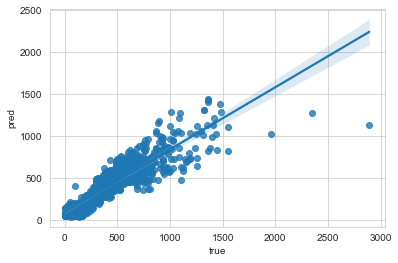

In [41]:
sns.regplot(results['true'], results['pred'])